# Churn Modelling

## Content

This project data set contains details of a bank's customers and the target variable is a binary variable which is reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. So here I am going to build a model that will determine if a customer will continue with bank or not.

In [38]:
# import necessary libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA 

The first thing I want to do here is look at the data. Identify numerical and categorical variables.
See if there is a need to clean the headers and data in a way preferred for formating and processing.  

In [11]:
df = pd.read_csv('Churn_Modelling.csv')

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Here, just taking a peek at the data, I can see that the headers are capitalized, the **'RowNumber' and 'CustomerId'** column is not needed since pandas gives me a good indexing system already. And just as a peek, without further exploring, I see that the data is freshly & nicely prepared as the numerical and categorical data have been separated quite nicely.

In [13]:
# convert all columns to lower
df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [14]:
# remove the 'rownumber' column and pr
del df['rownumber']
del df['customerid']

In [18]:
df.head()

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
# change all "string" data to lowercase
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower()

Okay now, I'll dive deeper into the data to discover the information about this data. 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   surname          10000 non-null  object 
 1   creditscore      10000 non-null  int64  
 2   geography        10000 non-null  object 
 3   gender           10000 non-null  object 
 4   age              10000 non-null  int64  
 5   tenure           10000 non-null  int64  
 6   balance          10000 non-null  float64
 7   numofproducts    10000 non-null  int64  
 8   hascrcard        10000 non-null  int64  
 9   isactivemember   10000 non-null  int64  
 10  estimatedsalary  10000 non-null  float64
 11  exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [24]:
df.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [25]:
df.isnull().sum()

surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

But on another look, I see I can change the **'hascrcard', 'isactivemember'** to categorical data with **'1' & '0' to 'yes' & 'no'** respectively. So there is some encoding to be done.

In [28]:
# has credit cards encoding
hascrcard_values = {
    1: 'yes',
    0: 'no'
}

df.hascrcard = df.hascrcard.map(hascrcard_values)

# is an active member
isactivemember_values = {
    1: 'yes',
    0: 'no'
}
df.isactivemember = df.isactivemember.map(isactivemember_values)

In [29]:
# look at the data again
df.head(10)

,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,hargrave,619,france,female,42,2,0.00,1,yes,yes,101348.88,1
1,hill,608,spain,female,41,1,83807.86,1,no,yes,112542.58,0
2,onio,502,france,female,42,8,159660.80,3,yes,no,113931.57,1
3,boni,699,france,female,39,1,0.00,2,no,no,93826.63,0
4,mitchell,850,spain,female,43,2,125510.82,1,yes,yes,79084.10,0
5,chu,645,spain,male,44,8,113755.78,2,yes,no,149756.71,1
6,bartlett,822,france,male,50,7,0.00,2,yes,yes,10062.80,0
7,obinna,376,germany,female,29,4,115046.74,4,yes,no,119346.88,1
8,he,501,france,male,44,4,142051.07,2,no,yes,74940.50,0
9,h?,684,france,male,27,2,134603.88,1,yes,yes,71725.73,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   surname          10000 non-null  object 
 1   creditscore      10000 non-null  int64  
 2   geography        10000 non-null  object 
 3   gender           10000 non-null  object 
 4   age              10000 non-null  int64  
 5   tenure           10000 non-null  int64  
 6   balance          10000 non-null  float64
 7   numofproducts    10000 non-null  int64  
 8   hascrcard        10000 non-null  object 
 9   isactivemember   10000 non-null  object 
 10  estimatedsalary  10000 non-null  float64
 11  exited           10000 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 937.6+ KB


In [31]:
# split the categorical and numerical columns
categorical = ['surname', 'geography', 'gender', 'hascrcard', 'isactivemember']
numerical = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

In [32]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:7]) # looks for all unique values
    print(df[col].nunique())
    print()

surname
['hargrave' 'hill' 'onio' 'boni' 'mitchell' 'chu' 'bartlett']
2931

creditscore
[619 608 502 699 850 645 822]
460

geography
['france' 'spain' 'germany']
3

gender
['female' 'male']
2

age
[42 41 39 43 44 50 29]
70

tenure
[2 1 8 7 4 6 3]
11

balance
[     0.    83807.86 159660.8  125510.82 113755.78 115046.74 142051.07]
6382

numofproducts
[1 3 2 4]
4

hascrcard
['yes' 'no']
2

isactivemember
['yes' 'no']
2

estimatedsalary
[101348.88 112542.58 113931.57  93826.63  79084.1  149756.71  10062.8 ]
9999

exited
[1 0]
2



From the above, it seems this there is no null value and all categorical variables are properly encoded. 

Next, look at the **relations** in our numerical data

In [36]:
df[numerical].corr() # the correlation matrix

,creditscore,age,tenure,balance,numofproducts,estimatedsalary
creditscore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
numofproducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
estimatedsalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


Does not say much

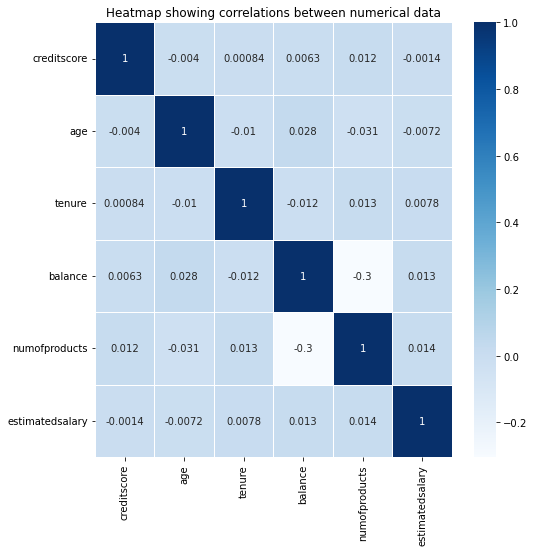

In [41]:
plt.figure(figsize=(8,8))  
sns.heatmap(df[numerical].corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [40]:
df[numerical].corr().unstack().sort_values(ascending = False)

creditscore      creditscore        1.000000
age              age                1.000000
numofproducts    numofproducts      1.000000
balance          balance            1.000000
tenure           tenure             1.000000
estimatedsalary  estimatedsalary    1.000000
balance          age                0.028308
age              balance            0.028308
estimatedsalary  numofproducts      0.014204
numofproducts    estimatedsalary    0.014204
                 tenure             0.013444
tenure           numofproducts      0.013444
estimatedsalary  balance            0.012797
balance          estimatedsalary    0.012797
creditscore      numofproducts      0.012238
numofproducts    creditscore        0.012238
estimatedsalary  tenure             0.007784
tenure           estimatedsalary    0.007784
creditscore      balance            0.006268
balance          creditscore        0.006268
creditscore      tenure             0.000842
tenure           creditscore        0.000842
creditscor

From here I can see there is low corelation amongst the numeric data.

### Data separation  - Setting up the validation framework

I am gonna split it into three datasets (train, val, and test) - training, validation and test datasets
I will use scikit-learn for this step